# Purpose of this simulation

we wanted to check that with full matrix works with lasso regression?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C

# so that we write in latex
from matplotlib import rc

# rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

import numpy as np
np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')
sns.set_theme("paper")

save_to_gdrive = True # this is done through the gdrive's mapping to the local file system
gdrive_directory = '/home/aolab/gdrive/Projects/Feature Selection/Figures/'
dpi_value = 300

/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# ideas

In [2]:
data_dump_folder = \
        '/home/aolab/sijia/data/figure3_lasso/'

ROUND_DECIMALS = 3


# random_seed =2
n_neurons = 128

# clda setup 
rho = 0.5
batchlen = 100
feature_selection_method = "joint_convex"
encoder_change_mode = "shuffle_rows"
# encoder_change_mode = "change_to_zeros"

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

# we set up the neural populations
mean_first_peak = 50
mean_second_peak = 100
std_of_peaks = 3

# feature_selection_method 
feature_selection_method = "full"
exp_conds = []

# uncomment out this to compare to the full feature selection method
# exp_conds_wo = [f'{feature_selection_method}_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_{encoder_change_mode}' ]
# exp_conds += exp_conds_wo

random_seeds = np.arange(10)


#smoothness_array =  np.arange(0.025, 0.15, 0.025)
smoothness_array = [0.05]
num_lags_array = [3]
num_of_features = 32 # specify how many features we want to use, or None


##### lasso
lasso_alphas = [10]
lasso_thresholds = [ 0, 1]

for random_seed in random_seeds:
    more_exp_conds = []
    for lasso_alpha in lasso_alphas:
        for lasso_threshold in lasso_thresholds:
            more_exp_conds.append(f'lasso_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_lasso_alpha_{lasso_alpha}_lasso_threshold_{lasso_threshold}_{encoder_change_mode}')

    exp_conds += more_exp_conds
            
    ##### last one is with the full feature selection
    more_exp_conds = []
    updater_type = "smooth_batch_with_full_feature"
    for lasso_alpha in lasso_alphas:
        for lasso_threshold in lasso_thresholds:
            more_exp_conds.append(f'lasso_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_of_peaks}_clda_rho_{rho}_batchlen_{batchlen}_lasso_alpha_{lasso_alpha}_lasso_threshold_{lasso_threshold}_{encoder_change_mode}')

            # add smooth batch with full batch
            UPDATER_TYPE = "smooth_batch_with_full_feature"
            if  UPDATER_TYPE != 'smooth_batch':
                more_exp_conds[-1] = more_exp_conds[-1] + f'_{UPDATER_TYPE}'
        
    exp_conds += more_exp_conds

# feature_selection_schemes = ['lasso threshold 0','lasso threshold 1', 'lasso threshold 2', 'lasso threshold 2.5',
#                              'lasso threshold 0 w/ full matrix','lasso w/ full matrix threshold 1', 'lasso w/ full matrix threshold 2', 'lasso w/ full matrix threshold 2.5']

feature_selection_schemes = ['lasso threshold 32',
                             'lasso threshold 64', 
                             'lasso w/ full matrix threshold 32 ',
                             'lasso w/ full matrix threshold 64']


print("the folder at which data is located:")
print(data_dump_folder)
for m,e in zip(feature_selection_schemes, exp_conds):print(m, ':', e)
print("Number of experiments:", len(exp_conds))
print("Number of feature selection schemes:", len(feature_selection_schemes))
print("Number of random seeds:", len(random_seeds))




the folder at which data is located:
/home/aolab/sijia/data/figure3_lasso/
lasso threshold 32 : lasso_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_lasso_alpha_10_lasso_threshold_0_shuffle_rows
lasso threshold 64 : lasso_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_lasso_alpha_10_lasso_threshold_1_shuffle_rows
lasso w/ full matrix threshold 32  : lasso_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_lasso_alpha_10_lasso_threshold_0_shuffle_rows_smooth_batch_with_full_feature
lasso w/ full matrix threshold 64 : lasso_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_lasso_alpha_10_lasso_threshold_1_shuffle_rows_smooth_batch_with_full_feature
Number of experiments: 40
Number of feature selection schemes: 4
Number of random seeds: 10


In [3]:
from afs_files import load_feature_selection_files, load_and_convert_clda_pickle_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
clda_data_all = load_and_convert_clda_pickle_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:382: UserWarning: Warning: no sync clock connected! This will usually result in problems.
  warnings.warn("Warning: no sync clock connected! This will usually result in problems.")
/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:449: UserWarning: No sync events present, using bmi3d events instead
  warnings.warn("No sync events present, using bmi3d events instead")


we collected 40 number of experiments


# Check feature selection strategies

## Plot selected features across feature selection methods

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

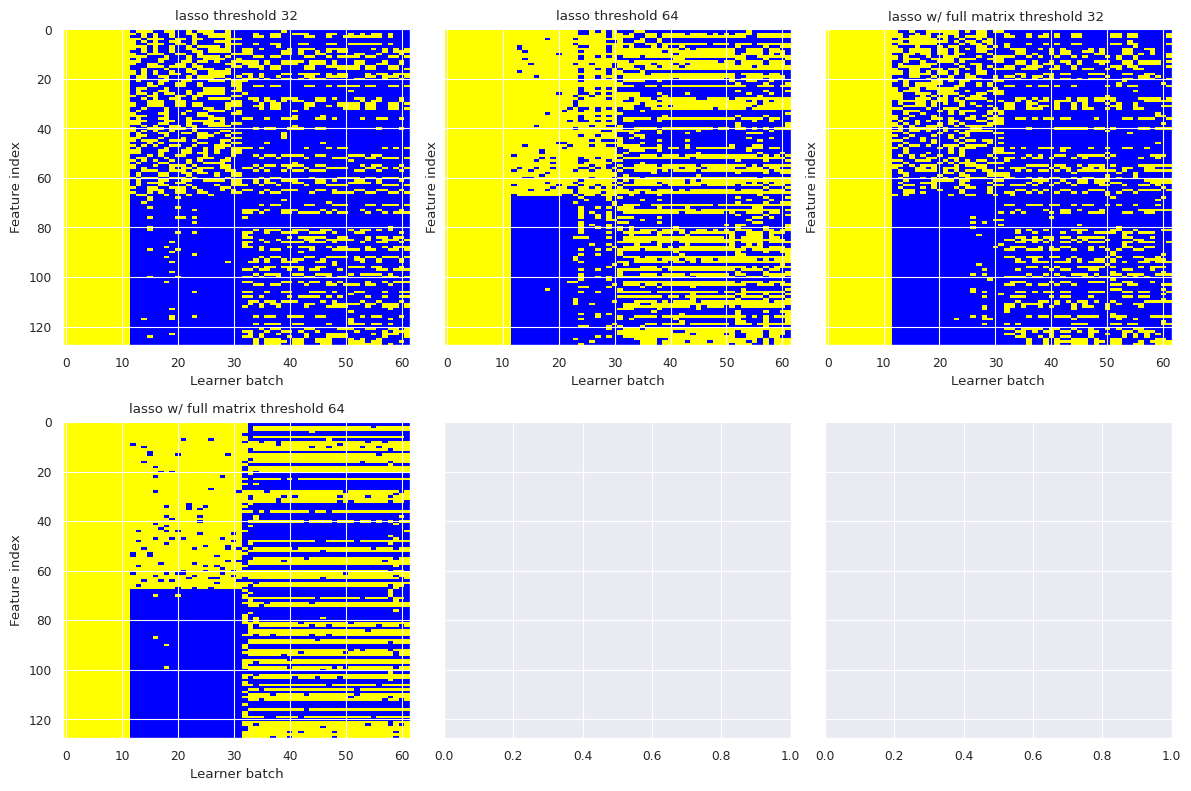

In [4]:
import importlib 
from afs_plotting import plot_feature_selection

if len(exp_data_all) ==  1:
    plot_feature_selection(exp_data_all[0]['feature_selection']['feat_set'])
else:
    
    num_columns = len(exp_data_all)

    fig_feat_activity, ax_feat_activity = plt.subplots(2, 3, 
                                                    sharey = True,
                                                    figsize = (12, 8))

    for i, (e, a, t) in enumerate(zip(exp_data_all,  ax_feat_activity.flatten(), feature_selection_schemes)):
        plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
        
        a.set_title(t)

fig_feat_activity.tight_layout()



In [5]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)


In [6]:
print(selected_feature_batches.shape)

selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)


smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches, 
                                                 mode = "incremental")

print(smoothness_conds_by_batch.shape)

(40, 62, 128)
(40, 61)


(40, 61)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

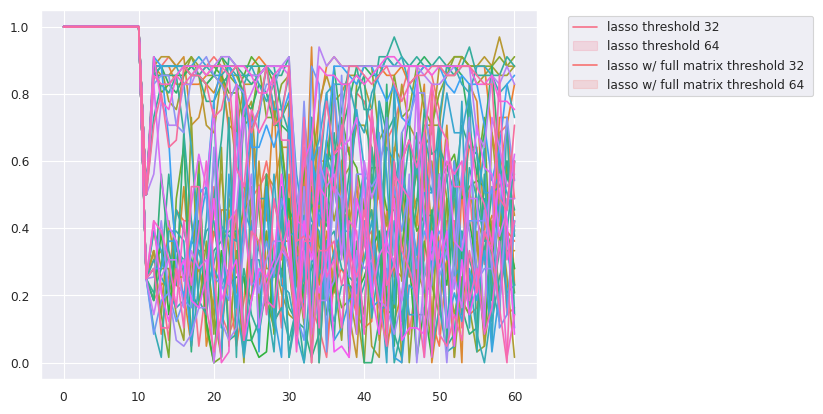

In [7]:
#sns.set_palette("Blues")

ax  = sns.lineplot(data = smoothness_conds_by_batch.T, dashes=False)
# ax.set_xticklabels(sparsity_array)
ax.set_title("")

# put legend outside of the plot

ax.legend(feature_selection_schemes, bbox_to_anchor=(1.05, 1), loc=2)
smoothness_conds_by_batch.shape

In [8]:
smoothness_conds_by_batch.shape

(40, 61)

In [14]:

# Assuming smoothness_conds_by_batch is a numpy array with shape (n_batches, n_features)

if len(random_seeds) == 1:
    window_size = 6
    weights = np.ones(window_size) / window_size
    smoothness_conds_by_batch_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                    axis=1,
                                                    arr=smoothness_conds_by_batch)
else:
    smoothness_conds_by_batch_ma = smoothness_conds_by_batch.reshape(len(random_seeds), len(feature_selection_schemes), smoothness_conds_by_batch.shape[-1])
    smoothness_conds_by_batch_ma = np.median(smoothness_conds_by_batch_ma, axis = 0)
    print(smoothness_conds_by_batch_ma.shape)

(4, 61)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

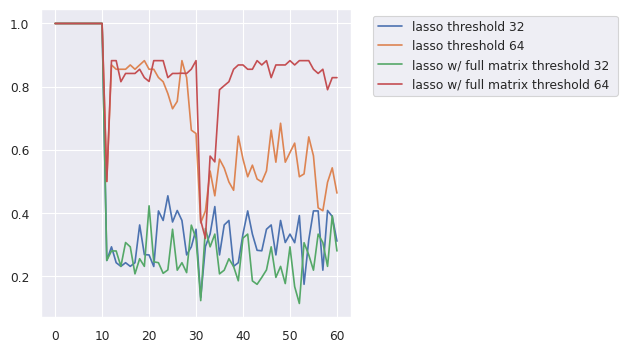

In [16]:

fig, ax = plt.subplots(1,1, figsize = (4, 4))
ax.plot(smoothness_conds_by_batch_ma.T)
ax.set_title("")

# put legend outside of the plot

ax.legend(feature_selection_schemes, 
          bbox_to_anchor=(1.05, 1), loc=2)

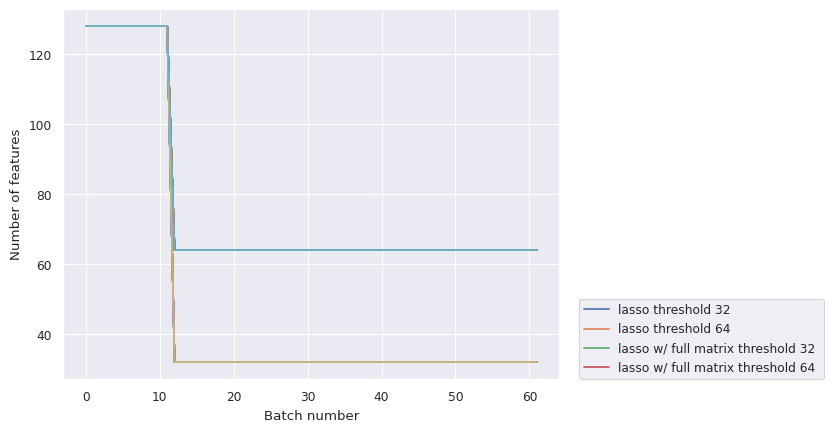

In [18]:
fig_num_features, ax_num_features = plt.subplots()

ax_num_features.plot(num_features_exp_by_batch.T)

ax_num_features.set_xlabel('Batch number')
ax_num_features.set_ylabel('Number of features')

ax_num_features.legend(feature_selection_schemes, loc=(1.04,0))

## calculate the relevance


In [26]:

R_2_over_batches_all_exp = []


X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6

for exp_index in range(len(exp_data_all)):
    # intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
    # spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']
    
    try:
        intended_kin = clda_data_all[exp_index]['intended_kin']
        spike_counts_batch = clda_data_all[exp_index]['spike_counts_batch']

        intended_kin = np.array(intended_kin)

        intended_velocities = intended_kin[:, [X_VEL_STATE, Y_VEL_STATE, CONST_STATE],:]
        # # get C_mat
        feature_selection_data = exp_data_all[exp_index]['feature_selection']
        C_mat = feature_selection_data["C_mat"]
        feat_set = feature_selection_data["feat_set"]

        # # calculate R_2 over batches
        R_2_over_batches = calc_R2_with_sim_C(spike_counts_batch, 
                                            intended_velocities,
                                            C_mat, feat_set, debug = False)
        
        # #save  the results
        R_2_over_batches_all_exp.append(R_2_over_batches)
        
        
    except Exception as e:
        print(f"KeyError: {e}not found in data.")
    
    # #save  the results
    # R_2_over_batches_all_exp.append(R_2_over_batches)

    
R_2_over_batches_all_exp = np.array(R_2_over_batches_all_exp)
R_2_over_batches_all_exp_gap = R_2_over_batches_all_exp.T

# apply moving average to the first axis

if len(random_seeds) == 1:
    window_size = 6
    weights = np.ones(window_size) / window_size
    R_2_over_batches_all_exp_gap_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                    axis=0,
                                                    arr=R_2_over_batches_all_exp_gap)
else:
    R_2_over_batches_all_exp_gap = R_2_over_batches_all_exp_gap.T
    R_2_over_batches_all_exp_gap_ma = R_2_over_batches_all_exp_gap.reshape(len(random_seeds), len(feature_selection_schemes), R_2_over_batches_all_exp_gap.shape[-1])
    R_2_over_batches_all_exp_gap_ma = np.median(R_2_over_batches_all_exp_gap_ma, axis = 0)
    R_2_over_batches_all_exp_gap_ma = R_2_over_batches_all_exp_gap_ma.T
    print(R_2_over_batches_all_exp_gap_ma.shape)

(60, 4)


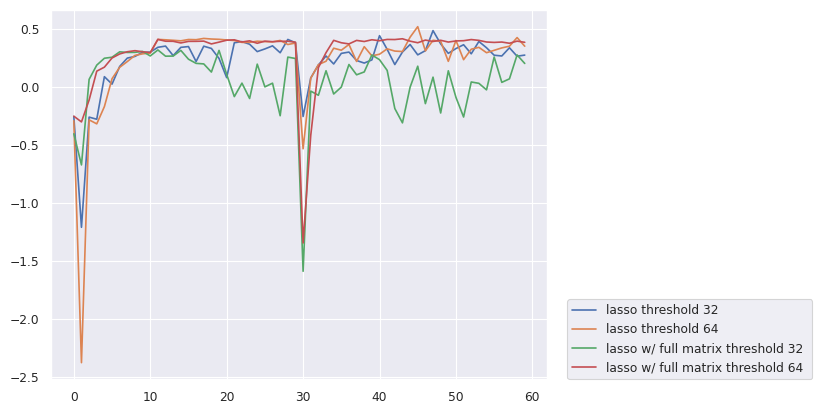

In [27]:
plt.plot(R_2_over_batches_all_exp_gap_ma)
plt.legend(feature_selection_schemes, loc=(1.04,0))



# Behaviour comparision

## count how many rewards

In [30]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)


# if more then one random seeds, we need to take the median

if len(random_seeds) == 1:
    window_size = 6
    weights = np.ones(window_size) / window_size
    reward_rate_all_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                    axis=0,
                                                    arr=reward_rate_all)
else:
    reward_rate_all_ma = reward_rate_all.reshape(len(random_seeds), len(feature_selection_schemes), reward_rate_all.shape[-1])
    reward_rate_all_ma = np.median(reward_rate_all_ma, axis = 0)
    total_rewards_all = reward_rate_all_ma.T
    print(reward_rate_all_ma.shape)

(4, 16)


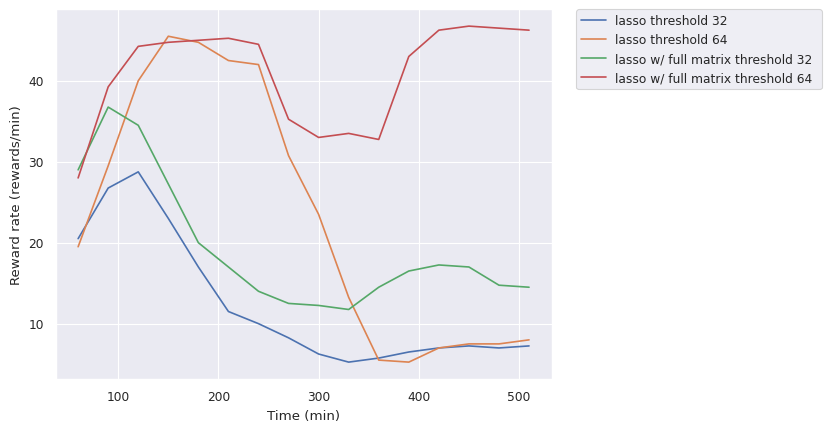

In [33]:
colors = ['blue', 'orange', 'red']

plt.plot(window_time_stamps, total_rewards_all)
plt.xlabel('Time (min)')
plt.ylabel(r'Reward rate (rewards/min)')
# put the legend outside of the figure
plt.legend(feature_selection_schemes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


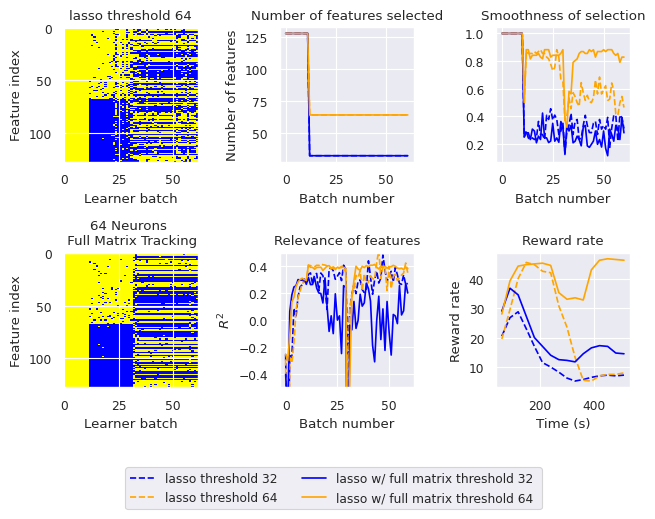

In [61]:
# let's make a summary plot
summary_figure, summary_axes = plt.subplots(2, 3, figsize = (6.5, 4.5))

# plot the feature selection results
plot_feature_selection(exp_data_all[1]['feature_selection']['feat_set'], ax = summary_axes[0,0])
plot_feature_selection(exp_data_all[3]['feature_selection']['feat_set'], ax = summary_axes[1,0])
summary_axes[0,0].set_title(feature_selection_schemes[1])
summary_axes[1,0].set_title("64 Neurons \n Full Matrix Tracking")

# specify the line styles
line_styles = ['--', '--', '-', '-']
line_colors = ['blue', 'orange', 'blue', 'orange']


# number of features selected
for row, ls, lc in zip(num_features_exp_by_batch, 
               line_styles, line_colors):
    summary_axes[0,1].plot(row, linestyle = ls, color = lc)

summary_axes[0,1].set_xlabel('Batch number')
summary_axes[0,1].set_ylabel('Number of features')
summary_axes[0,1].set_title('Number of features selected')
# plot the relevance of the features

for row, ls, lc in zip(R_2_over_batches_all_exp_gap_ma.T, 
               line_styles, line_colors):
    summary_axes[1,1].plot(row, linestyle = ls, color = lc)

summary_axes[1,1].set_xlabel('Batch number')
summary_axes[1,1].set_ylabel('$R^2$')
summary_axes[1,1].set_title('Relevance of features')
summary_axes[1,1].set_ylim([-0.5, 0.5])

# put the legend below the plot
# summary_axes[1,1].legend(feature_selection_schemes, ncol = 2)


# plot the smoothness of the features

for row, ls, lc in zip(smoothness_conds_by_batch_ma, 
               line_styles, line_colors):
    summary_axes[0,2].plot(row, linestyle = ls, color = lc)
summary_axes[0,2].set_xlabel('Batch number')
summary_axes[0,2].set_title('Smoothness of selection')

# plot the reward rate
for row, ls, lc in zip(total_rewards_all.T, 
               line_styles, line_colors):
    summary_axes[1,2].plot(window_time_stamps, row, 
                           linestyle = ls, color = lc)
summary_axes[1,2].set_ylabel('Reward rate')
summary_axes[1,2].set_xlabel('Time (s)')
summary_axes[1,2].set_title('Reward rate')

summary_figure.legend(feature_selection_schemes, bbox_to_anchor=(0.2,  -0.05), 
                        ncol = 2, loc=2, borderaxespad=0.)  

# plot the reward rate
summary_figure.tight_layout()
summary_figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

## save to gdrive

In [62]:
if save_to_gdrive:
    summary_figure.savefig(gdrive_directory + 'figure3_lasso_encoder_change.pdf', dpi = dpi_value)
    summary_figure.savefig(gdrive_directory + 'figure3_lasso_encoder_change.png', dpi = dpi_value)